# Step 2: Exploratory Analysis and Feature Selection

##### (a). Finalize the datasets you plan to use for your classifier

For this project I will be using two different tables of data. The first will be inpatient charges which contains the locaion of a hospital the service provided to the paitient, and finally the average cost for the service. The second is Hospital General information which contains the location of a hospital and then ratings for different services they provide. For classification, based I can predict the certain hospital a paitent went to based on the price they paid for their service, the location of the patient, and the overall ratings of the hospitals (assuming that a patient has chosen to go to the best rated hospuital for their service)

##### (b). Provide information about your datasets including the attributes and attribute types, the number of instances, and the attribute(s) you will be using as class labels for predictions.


##### Inpatient Charges Data:

Attributes:

* DRG Definition = Nominal - Service/Condition for being in hospital
* Provider Id = Nominal - Id for the specific hospital
* Provider Name = Nominal - Name of the Hospital 
* Provider Street Address = Nominal - Address of the Hospital
* Provider City = Nominal - City Hospital is Located
* Provider State = Nominal - State Hospital is Located
* Provider ZIP Code = Nominal - Zip Code of Hospital
* Hospital Referall Region Description - Nominal - City/Region the Hospital provides for. Ex: "CA - Los Angeles"
* Total number of Discharges = Interval - Discharges for the given condition in a certain hospital
* Average Covered Charges = Interval - Amount of Money Covered for the given condition in a certain hospital
* Average Total Payments = Interval - Average total payment for service

Classification:
    I will be using the cost and the hospital id to predict the DRG, the service/condition for a certain patient 

##### Hospital General Information:

Attributes:

* Provider ID = Nominal - Id for the specific hospital
* Hospital Name = Nominal - Name of the Hospital
* Address = Nominal - Address of the Hospital
* City = Nominal - City Hospital is Located
* State = Nominal - State Hospital is Located
* ZIP Code = Nominal - Zip Code of Hospital
* County Name = Nominal - County for specific Hospital
* Phone Number = Nominal - Phone Number for a Hospital
* Hospital Type = Nominal - Type of Hospital (ie. Acute Care, Critical Access)
* Hospital Ownership = Nominal - Type of Ownership (ie. Voluntary Non-Profit, Proprietary)
* Emergency Services = Interval - y or n if they have emergency service
* Meets criteria for meaningful use of EHRs = Interval - y or n for having an Electronic Health record
* Hospital overall rating = Ordinal - Rating of Hospital 1-5
* Hospital overall rating footnote = Nominal - Explanation for rating 
* Mortality national comparison = Nominal - Comparing to national average for Mortality (ie. Same as national average, Below Average, Above Average)
* Mortality national comparison footnote = Nominal - Explanation
* Safety of care national comparison = Nominal - Comparing to national average for Safety of Care (ie. Same as national average, Below Average, Above Average)
* Safety of care national comparison footnote = Nominal - Explanation
* Readmission national comparison = Nominal - Comparing to national average for readmission (ie. Same as national average, Below Average, Above Average)
* Readmission national comparison footnote = Nominal - Explanation
* Patient experience national comparison = Nominal - Comparing to national average for Patient Experience (ie. Same as national average, Below Average, Above Average)
* Patient experience national comparison footnote = Nominal - Explanation 
* Effectiveness of care national comparison = Nominal - Comparing to national average for Effectiveness of Care(ie. Same as national average, Below Average, Above Average)
* Effectiveness of care national comparison footnote = Nominal - Explanation
* Timeliness of care national comparison = Nominal - Comparing to national average for Timliness of care (ie. Same as national average, Below Average, Above Average)
* Timeliness of care national comparison footnote = Nominal Explanation
* Efficient use of medical imaging national comparison = Comparing to national average for Efficient use of medical imaging (ie. Same as national average, Below Average, Above Average)
* Efficient use of medical imaging national comparison = Nominal - Explanation

Classification:

I will be using the DRG Definition, The Overall Hospital Rating, and the Average Cost to Predict the certain Hospital used

* DRG Definition = Nominal - Service/Condition for being in hospital
* Average Total Payments = Interval - Average total payment for service
* Hospital overall rating = Ordinal - Rating of Hospital 1-5

To Predict:
* Provider Id = Nominal - Id for the specific hospital
* Provider Name = Nominal - Name of the Hospital

In [9]:
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

Import Files into a Data Table and display number of instances for each

In [10]:
inpatient_charges_table = DataTable(["DRG Definition","Provider Id","Hospital Name","Address","City",
                                    "State","ZIP Code","Hospital Referral Region Description", "Total Discharges" , 
                                    "Average Covered Charges" , "Average Total Payments ","Average Medicare Payments"])

hospital_info_table = DataTable(["Provider ID","Hospital Name","Address","City","State","ZIP Code","County Name",
                                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                                "Meets criteria for meaningful use of EHRs","Hospital overall rating","Hospital overall rating footnote",
                                "Mortality national comparison","Mortality national comparison footnote",
                                "Safety of care national comparison","Safety of care national comparison footnote",
                                "Readmission national comparison","Readmission national comparison footnote",
                                "Patient experience national comparison","Patient experience national comparison footnote",
                                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote"])                               
inpatient_charges_table.load("inpatientCharges.csv")
hospital_info_table.load("Hospital General Information.csv")

print("Inpatient Data Instances = ", inpatient_charges_table.row_count())
print("Hospital General Info Instances = ", hospital_info_table.row_count())

Inpatient Data Instances =  163066
Hospital General Info Instances =  4813


##### (c). Provide initial data visualizations highlighting important and/or interesting aspects of your datasets related to your classification problem. Visualizations may include frequency distributions, comparisons of attributes (scatterplot, multiple frequency diagrams), and so on. The goal is not to include all possible diagrams, but instead to select and highlight diagrams that provide insight about the dataset and your classification itself. Each visualization must be clearly and accurately labeled.

First Join the Tables based on Hospital name and City while removing non matches

In [11]:

combined_table = DataTable.combine(inpatient_charges_table, hospital_info_table, ["Hospital Name", "Address", "City", "State", "ZIP Code"])
del combined_table[0]
print(combined_table.row_count())

106683


Visualizations

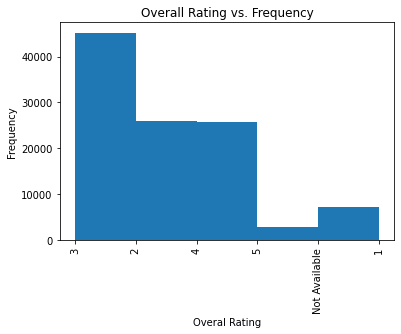

<Figure size 8640x8640 with 0 Axes>

In [12]:
# Frequency of rating for a hospital
histogram(combined_table, "Hospital overall rating", 5, "Overal Rating", "Frequency", "Overall Rating vs. Frequency")

In [13]:
temp_table = combined_table.copy()
temp_table.drop(["DRG Definition", "Hospital Referral Region Description", "Total Discharges" , 
                "Average Covered Charges" , "Average Total Payments ","Average Medicare Payments", "Hospital overall rating footnote",
                "Mortality national comparison","Mortality national comparison footnote",
                "Safety of care national comparison","Safety of care national comparison footnote",
                "Readmission national comparison","Readmission national comparison footnote",
                "Patient experience national comparison","Patient experience national comparison footnote",
                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote",
                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                "Meets criteria for meaningful use of EHRs"])

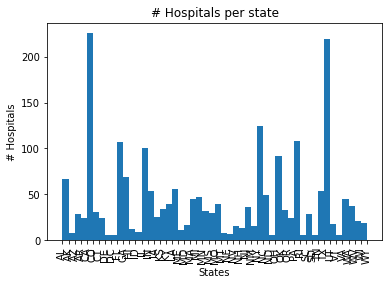

<Figure size 8640x8640 with 0 Axes>

In [14]:
hospital_table = remove_duplicates(temp_table)
histogram(hospital_table, "State", 50, "States", "# Hospitals", "# Hospitals per state")


In [31]:
hospital_cost_table = combined_table.copy()
hospital_cost_table.drop(["Hospital Referral Region Description", "Total Discharges" , 
                "Average Covered Charges","Average Medicare Payments", "Hospital overall rating footnote",
                "Mortality national comparison","Mortality national comparison footnote",
                "Safety of care national comparison","Safety of care national comparison footnote",
                "Readmission national comparison","Readmission national comparison footnote",
                "Patient experience national comparison","Patient experience national comparison footnote",
                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote",
                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                "Meets criteria for meaningful use of EHRs"])
for row in range(hospital_cost_table.row_count()):
    s = hospital_cost_table[row]["Average Total Payments "]
    s = s.replace("$", "")
    s = hospital_cost_table.convert_numeric(s)
    hospital_cost_table[row]["Average Total Payments "] = s


In [47]:
p_list = partition(hospital_cost_table, ["State"])

In [58]:
label = []
d = []
for p in p_list:
    vals = []
    name = p[0]["State"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices = DataTable(['State', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices.append([s, d[s]])
print(hospital_avg_prices)

  State    Average Total Payments
-------  -------------------------
      0                    7559.27
      1                   14409.3
      2                   10216.6
      3                    7918.21
      4                   12620.4
      5                    9294.31
      6                   11486
      7                   10360.1
      8                   12147.2
      9                    8724.35
     10                    8911.31
     11                   12859.9
     12                    9964.32
     13                    9882.82
     14                    8669.33
     15                    8518.83
     16                    8056.24
     17                    8082.95
     18                    8497.54
     19                    8886.92
     20                   12879.7
     21                   10421.3
     22                   10328.8
     23                    9554.74
     24                    8709.53
     25                    8552.46
     26                    9134.3

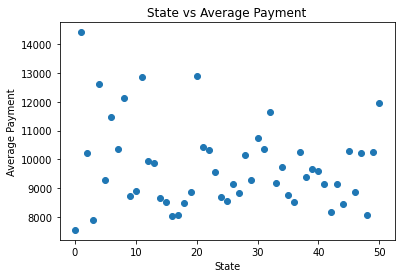

In [61]:
scatter_plot(column_values(hospital_avg_prices, "State"), column_values(hospital_avg_prices, "Average Total Payments "), "State", "Average Payment", "State vs Average Payment")

##### (d). A list of the features (attributes) you will be using to train your classifiers and a justification for their use.

To Train my Classifiers I will be using:

* DRG Definition = Nominal - Service/Condition for being in hospital
* Average Covered Charges = Interval - Amount of Money Covered for the given condition in a certain hospital
* Hospital overall rating = Ordinal - Rating of Hospital 1-5

I will be using these becuase cost for a ceratin patient vaires for a service base on the location of the hospital So to use the average cost for the charge and the service or condition will allow me to predict the certain hosputal where the service was provided.
Additionally, I will be usign the overall rating since it will fuirther allow the classifiers to find a specific hospital. For instance, there are multiple hospitals in a given city of state who most likely have simialr costs for certain services, so by using the rating it will be able to specifically select which hospital a paitent went to, instead of just the city or state. 


##### (e). The types of cleaning operations you will be performing, including handling of missing values and discretization.

For cleaning I will first be removing all unescessary columns. These include every column except for:

* DRG Definition = Nominal - Service/Condition for being in hospital
* Average Total Payments = Interval - Average total payment for service
* Hospital overall rating = Ordinal - Rating of Hospital 1-5
* Hospital Name = Nominal - Name of the Hospital
* Address = Nominal - Address of the Hospital
* City = Nominal - City Hospital is Located
* State = Nominal - State Hospital is Located
* ZIP Code = Nominal - Zip Code of Hospital
* County Name = Nominal - County for specific Hospital

When handeling with missing values within the Average Total Payments I will be replacing it with the mean for the specific location the hospital is located. Partitioning on States and the service to replace with the mean of that distribution. For all other columns with missing values I will be removing the row. Additionally I will be removing duplicate rows of the Hospital and the service provided. For the overall rating I will be removing rows with missing values/ However, that columns contains intances saying "Overall rating not available" for those rows I will also be removing them. Additionally, for the average total payments I will have to convert them to numeric values

For discretization, I will be binning the Average total Cost as to not skew the data when Classifying.
